In [139]:
# https://github.com/SamQLuong/Comparing-Classifiers-like-LDA-SVM-and-DTC
# importing classifiers and other libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
import time
mnist = fetch_openml('mnist_784') # imports mnist dataset

In [140]:
# grabs the data set into X and the labels of the dataset in Y
X = mnist.data / 255
Y = mnist.target

U, s, V = np.linalg.svd(X, full_matrices = False) # performs SVD on dataset

print(U.shape)
print(s.shape)
print(V.shape)

(70000, 784)
(784,)
(784, 784)


Text(0.5, 1.0, 'SVD Singular Value Spectrum')

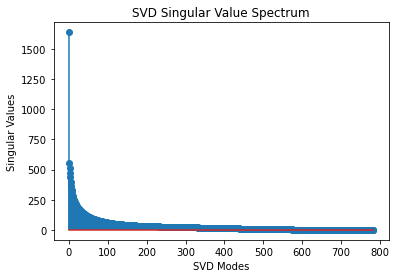

In [141]:
# plot the singular value spectrum using a stem graph
plt.stem(s)
plt.xlabel('SVD Modes')
plt.ylabel('Singular Values')
plt.title('SVD Singular Value Spectrum')

In [142]:
# finds the number of modes depending on the targeting percentage of variance
current = 0
target = 0.9
i = 0
while current < target:
    current += s[i] ** 2 / np.sum(s ** 2) # caculates the percent of variance
    i+=1

print(i+1)

54


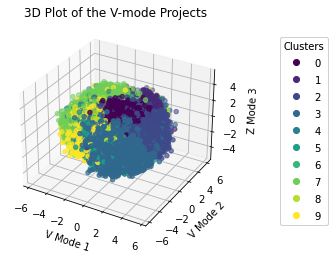

In [143]:
# performs dot product with X and V.T to find the projections
V_project = np.dot(X, V.T)

# plots the projection in a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
scatter = ax.scatter(V_project[:,2],V_project[:,3], V_project[:, 5], c=Y.astype(int))
legend = ax.legend(*scatter.legend_elements(),
                    loc = 'center right',bbox_to_anchor=(1.5, 0.5), title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('V Mode 1')
ax.set_ylabel('V Mode 2')
ax.set_zlabel('Z Mode 3')
ax.set_title('3D Plot of the V-mode Projects')
plt.show()

In [145]:
# returns the training and testing data for two digit separation
# the input parameters requires two digits
# the targeting data is turn into int and
# the X and Y are filtered to only the two digits
# the data set is then split into training and testing
def classifer2(digit1, digit2):
    y1 = Y.astype(int)
    X1 = X[(y1 == digit1) | (y1 == digit2)]
    y1 = Y[(y1 == digit1) | (y1 == digit2)]
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
    
    return X_train, X_test, y_train, y_test

# returns the training and testing data for three digit separation
# the input parameters requires three digits
# the targeting data is turn into int and
# the X and Y are filtered to only the three digits
# the data set is then split into training and testing
def classifer3(digit1, digit2, digit3):
    y1 = Y.astype(int)
    X1 = X[(y1 == digit1) | (y1 == digit2) | (y1 == digit3)]
    y1 = Y[(y1 == digit1) | (y1 == digit2) | (y1 == digit3)]
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [146]:
# creates an array of different combinations of two digits
comb = [[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],
        [1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],
        [2,3],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],
        [3,4],[3,5],[3,6],[3,7],[3,8],[3,9],
        [4,5],[4,6],[4,7],[4,8],[4,9],
        [5,6],[5,7],[5,8],[5,9],
        [6,7],[6,8],[6,9],
        [7,8],[7,9],
        [8,9]]

In [153]:
start = time.time() # creates the starting time
scoreArrayLDA = [] # empty array of scoring

# performs the LDA and inputs the scoring in scoreArrayLDA
for i in comb:
    X_train, X_test, y_train, y_test = classifer2(i[0], i[1])
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    
    # performs the scoring caculations
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreArrayLDA.append(score)
    
end = time.time() # creates the ending time

print('Length of Time for LDA: ', end - start) # outputs length of computing

Length of Time for LDA:  80.85871005058289


In [154]:
start = time.time() # creates the starting time
scoreArrayDTC = [] # empty array of scoring

# performs the DTC and inputs the scoring in scoreArrayDTC
for i in comb:
    X_train, X_test, y_train, y_test = classifer2(i[0], i[1])
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # performs the scoring caculations
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreArrayDTC.append(score)
    
end = time.time() # creates the ending time

print('Length of Time for DTC: ', end - start) # outputs length of computing

Length of Time for DTC:  66.19771194458008


In [155]:
start = time.time() # creates the starting time
scoreArraySVM = [] # empty array of scoring

# performs the SVM and inputs the scoring in scoreArraySVM
for i in comb:
    X_train, X_test, y_train, y_test = classifer2(i[0], i[1])
    clf = SVC()
    clf.fit(X_train, y_train)
    
    # performs the scoring caculations
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreArraySVM.append(score)
    
end = time.time() # creates the ending time

print('Length of Time for SVM: ', end - start) # outputs the length of computing

Length of Time for SVM:  203.96178460121155


In [156]:
max = np.max(scoreArrayLDA) # finds the highest scoring digits in LDA
max_index = scoreArrayLDA.index(max) # finds the easiest digits to separate in LDA

min = np.min(scoreArrayLDA) # finds the lowest scoring digits in LDA
min_index = scoreArrayLDA.index(min) # finds the hardest digits to separate in LDA

# prints resulting digit's index
print('Max Index: ',max_index)
print('Min Index: ',min_index)

# prints resulting digits and scoring for DTC and SVM
print('DTC Max: ', scoreArrayDTC[39])
print('SVM Max: ', scoreArraySVM[39])

print('DTC Min: ', scoreArrayDTC[25])
print('SVM Min: ', scoreArraySVM[25])

# prints the resulting digits and scoring for LDA
print('LDA Max Score: ',max)
print('Easiest digits to Separate: ',comb[max_index])

print('LDA Min Score: ',min)
print('Hardest digits to Separate: ',comb[min_index])

Max Index:  39
Min Index:  25
DTC Max:  0.993413314514232
SVM Max:  1.0
DTC Min:  0.9566509784493435
SVM Min:  0.9920733217735943
LDA Max Score:  0.9955304634203717
Easiest digits to Separate:  [6, 7]
LDA Min Score:  0.9484765915283626
Hardest digits to Separate:  [3, 5]


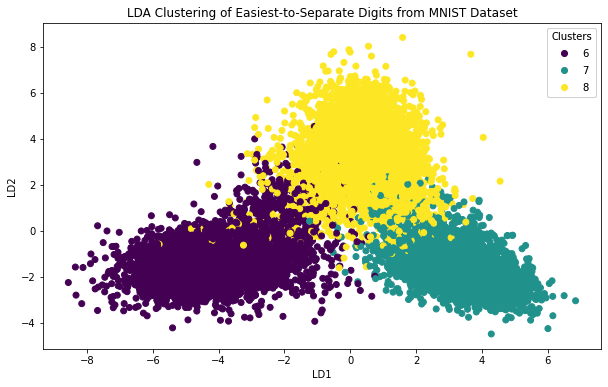

In [157]:
y1 = Y.astype(int)

# filters out digits execpt the digits needed for the LDA scatter plot
X_filtered = X[(y1 == 6) | (y1 == 7) | (y1 == 8)]
y_filtered = Y[(y1 == 6) | (y1 == 7) | (y1 == 8)]

# condense the data into LDA in 2D
clf = LinearDiscriminantAnalysis(n_components = 2)

# transform the data so that it can be place in a scatter graph
X_lda = clf.fit_transform(X_filtered, y_filtered)

# graph the data into a pltot with legends
fig, ax = plt.subplots(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_filtered.astype(int), cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    title="Clusters")
ax.add_artist(legend)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Clustering of Easiest-to-Separate Digits from MNIST Dataset')
plt.show()

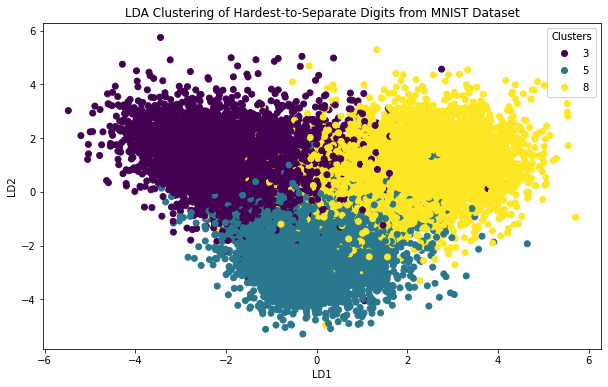

In [158]:
y1 = Y.astype(int)

# filters out digits execpt the digits needed for the LDA scatter plot
X_filtered = X[(y1 == 3) | (y1 == 5) | (y1 == 8)]
y_filtered = Y[(y1 == 3) | (y1 == 5) | (y1 == 8)]

# condense the data into LDA in 2D
clf = LinearDiscriminantAnalysis(n_components = 2)

# transform the data so that it can be place in a scatter graph
X_lda = clf.fit_transform(X_filtered, y_filtered)

# graph the data into a pltot with legends
fig, ax = plt.subplots(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_filtered.astype(int), cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    title="Clusters")
ax.add_artist(legend)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Clustering of Hardest-to-Separate Digits from MNIST Dataset')
plt.show()